In [31]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Dosya yolunun belirtilmesi
df_train = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv', index_col='Id')
df_test = pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/test.csv', index_col='Id')
df = df_train.copy()

In [33]:
#burada veriyi işlemeden önce eksik veri olup olmadığını kontrol ediyoruz. 
print(df[['GrLivArea', 'SalePrice', 'OverallQual']].isnull().sum())


GrLivArea      0
SalePrice      0
OverallQual    0
dtype: int64


In [34]:
# NaN değerlerini kaldırma
df = df.dropna(subset=['GrLivArea', 'OverallQual', 'SalePrice'])


X = df[['GrLivArea', 'OverallQual']].values
y = df['SalePrice'].values


In [35]:
print(df.isnull().sum())  # Eksik değerleri kontrol et
print(np.isinf(y).sum())  # Sonsuz değerleri kontrol et


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 80, dtype: int64
0


In [36]:
from sklearn.preprocessing import StandardScaler

# Özellikleri normalleştir
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Bias ekle
X_bias = np.c_[np.ones((len(X_normalized), 1)), X_normalized]


In [37]:
print("X shape:", X_bias.shape)  
print("y shape:", y.shape)  


X shape: (1460, 3)
y shape: (1460,)


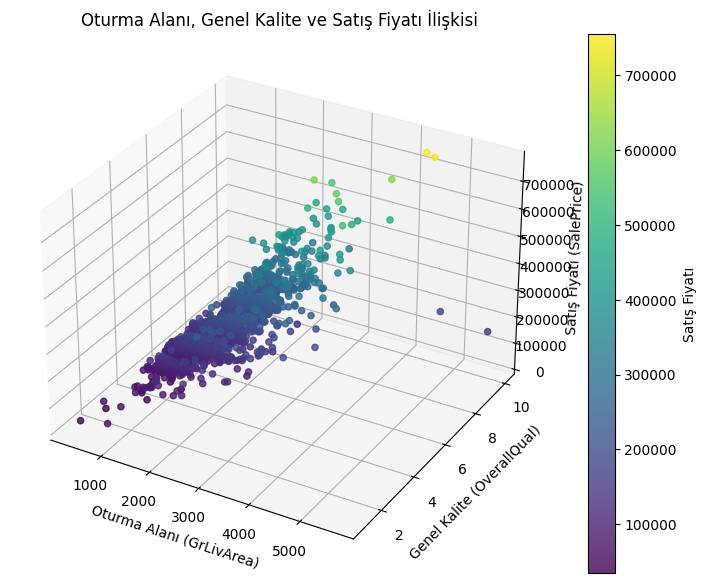

In [38]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Değişkenler
x1 = df['GrLivArea'].values  # Oturma alanı
x2 = df['OverallQual'].values  # Genel kalite
y = df['SalePrice'].values  # Satış fiyatı

# 3D scatter plot oluşturma
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Verileri scatter plot ile görselleştirme
scatter = ax.scatter(x1, x2, y, c=y, cmap='viridis', alpha=0.8)

# Eksen etiketleri
ax.set_xlabel('Oturma Alanı (GrLivArea)')
ax.set_ylabel('Genel Kalite (OverallQual)')
ax.set_zlabel('Satış Fiyatı (SalePrice)')

# Renk çubuğu (colorbar) ekleme
fig.colorbar(scatter, ax=ax, label='Satış Fiyatı')

# Grafik başlığı
plt.title("Oturma Alanı, Genel Kalite ve Satış Fiyatı İlişkisi")

# Göster
plt.show()


Theta 0 (Bias): -104092.66963598228
Theta 1 (GrLivArea): 55.86222590660731
Theta 2 (OverallQual): 32849.047440625465


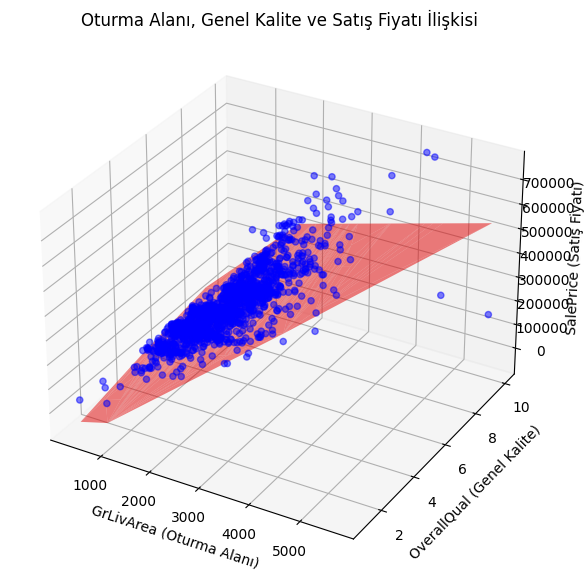

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Regresyon katsayılarını hesaplayan analitik fonksiyon 
def analyticsMethod(X, y):
    # X'e bir bias (sabit terim) ekliyoruz
    X_bias = np.c_[np.ones((X.shape[0], 1)), X]

    # (X.T * X)^(-1) * X.T * y
    theta = np.linalg.inv(X_bias.T.dot(X_bias)).dot(X_bias.T).dot(y)
    return theta

# X iki değişkeni içeriyor (GrLivArea ve OverallQual)
X = df[['GrLivArea', 'OverallQual']].values
y = df['SalePrice'].values


theta = analyticsMethod(X, y)


theta0 = theta[0]  # Bias (sabit terim)
theta1 = theta[1]  # GrLivArea için katsayı
theta2 = theta[2]  # OverallQual için katsayı


print(f'Theta 0 (Bias): {theta0}')
print(f'Theta 1 (GrLivArea): {theta1}')
print(f'Theta 2 (OverallQual): {theta2}')

# Scatter plot ile veriyi görselleştiriyoruz
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Verileri görselleştirme
ax.scatter(X[:, 0], X[:, 1], y, color='blue', alpha=0.5)

# GrLivArea ve OverallQual'a göre tahmin edilen satış fiyatı
y_pred = theta0 + theta1 * X[:, 0] + theta2 * X[:, 1]

# Regresyon düzlemini çizme
ax.plot_trisurf(X[:, 0], X[:, 1], y_pred, color='red', alpha=0.5)


ax.set_xlabel('GrLivArea (Oturma Alanı)')
ax.set_ylabel('OverallQual (Genel Kalite)')
ax.set_zlabel('SalePrice (Satış Fiyatı)')


plt.title("Oturma Alanı, Genela Kalite ve Satış Fiyatı İlişkisi")

plt.show()


In [40]:


# Theta'yı hesapla
theta_analytical = analyticsMethod(X, y)

# Theta değerlerini ayırıyoruz
theta0_a = theta_analytical[0]  # Bias (sabit terim)
theta1_a = theta_analytical[1]  # GrLivArea için katsayı
theta2_a = theta_analytical[2]  # OverallQual için katsayı

# Theta değerlerini yazdırıyoruz
print(f'Analitik Yöntem ile Hesaplanan Theta 0 (Bias): {theta0_a}')
print(f'Analitik Yöntem ile Hesaplanan Theta 1 (GrLivArea): {theta1_a}')
print(f'Analitik Yöntem ile Hesaplanan Theta 2 (OverallQual): {theta2_a}')


Analitik Yöntem ile Hesaplanan Theta 0 (Bias): -104092.66963598228
Analitik Yöntem ile Hesaplanan Theta 1 (GrLivArea): 55.86222590660731
Analitik Yöntem ile Hesaplanan Theta 2 (OverallQual): 32849.047440625465


In [41]:
print("X shape:", X_bias.shape)  
print("y shape:", y.shape)  

X shape: (1460, 3)
y shape: (1460,)


In [73]:
import numpy as np
from sklearn.preprocessing import StandardScaler


# Veri ölçeklendirme
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Gradient Descent Fonksiyonu
def gradient_descent(X, y, learning_rate=0.001, iterations=1000):
    m = len(y)
    X_bias = np.c_[np.ones((m, 1)), X]  
    theta = np.random.randn(X_bias.shape[1])  # Theta başlatma
    cost_history = []
    
    for i in range(iterations):
        y_pred = X_bias.dot(theta)
        error = y_pred - y
        cost = (1/(2*m)) * np.dot(error, error)
        cost_history.append(cost)
        gradients = (1/m) * X_bias.T.dot(error)
        theta -= learning_rate * gradients
        
        # Her 10 iterasyonda maliyet yazdırma
        if i % 50 == 0:
            print(f"Iterasyon {i}: Maliyet = {cost}")
    
    return theta, cost_history

# Gradient Descent ile Theta'yı hesaplama
theta_gd, cost_history = gradient_descent(X_scaled, y, learning_rate=0.001, iterations=1500)


theta0_gd = theta_gd[0]  # Bias (sabit terim)
theta1_gd = theta_gd[1]  # İlk özellik için katsayı
theta2_gd = theta_gd[2]  # İkinci özellik için katsayı

# Theta değerlerini yazdırıyoruz
print(f'Gradient Descent ile Hesaplanan Theta 0 (Bias): {theta0_gd}')
print(f'Gradient Descent ile Hesaplanan Theta 1: {theta1_gd}')
print(f'Gradient Descent ile Hesaplanan Theta 2: {theta2_gd}')


Iterasyon 0: Maliyet = 0.6466384532789478
Iterasyon 50: Maliyet = 0.5898440472796768
Iterasyon 100: Maliyet = 0.5384362119282947
Iterasyon 150: Maliyet = 0.49189962527151887
Iterasyon 200: Maliyet = 0.44976868557941774
Iterasyon 250: Maliyet = 0.4116226746909204
Iterasyon 300: Maliyet = 0.3770813955283817
Iterasyon 350: Maliyet = 0.34580123695637505
Iterasyon 400: Maliyet = 0.31747162381495364
Iterasyon 450: Maliyet = 0.2918118141470532
Iterasyon 500: Maliyet = 0.26856800941040093
Iterasyon 550: Maliyet = 0.24751074685828253
Iterasyon 600: Maliyet = 0.22843254632866677
Iterasyon 650: Maliyet = 0.21114578643151924
Iterasyon 700: Maliyet = 0.19548078760022602
Iterasyon 750: Maliyet = 0.18128408170241056
Iterasyon 800: Maliyet = 0.1684168499127844
Iterasyon 850: Maliyet = 0.15675351235827029
Iterasyon 900: Maliyet = 0.14618045467345814
Iterasyon 950: Maliyet = 0.1365948780705185
Gradient Descent ile Hesaplanan Theta 0 (Bias): 0.4416215070354697
Gradient Descent ile Hesaplanan Theta 1: -0.


Öğrenme Oranı: 0.1
Iterasyon 0: Maliyet = 0.5320112066329473
Iterasyon 50: Maliyet = 0.04261451581342215
Iterasyon 100: Maliyet = 0.04259861640475759
Iterasyon 150: Maliyet = 0.042598615520399744
Iterasyon 200: Maliyet = 0.04259861552033797
Iterasyon 250: Maliyet = 0.04259861552033797
Iterasyon 300: Maliyet = 0.04259861552033797
Iterasyon 350: Maliyet = 0.04259861552033795
Iterasyon 400: Maliyet = 0.04259861552033795
Iterasyon 450: Maliyet = 0.04259861552033795
Iterasyon 500: Maliyet = 0.04259861552033795
Iterasyon 550: Maliyet = 0.04259861552033795
Iterasyon 600: Maliyet = 0.04259861552033795
Iterasyon 650: Maliyet = 0.04259861552033795
Iterasyon 700: Maliyet = 0.04259861552033795
Iterasyon 750: Maliyet = 0.04259861552033795
Iterasyon 800: Maliyet = 0.04259861552033795
Iterasyon 850: Maliyet = 0.04259861552033795
Iterasyon 900: Maliyet = 0.04259861552033795
Iterasyon 950: Maliyet = 0.04259861552033795

Öğrenme Oranı: 0.01
Iterasyon 0: Maliyet = 0.8626005618242641
Iterasyon 50: Maliye

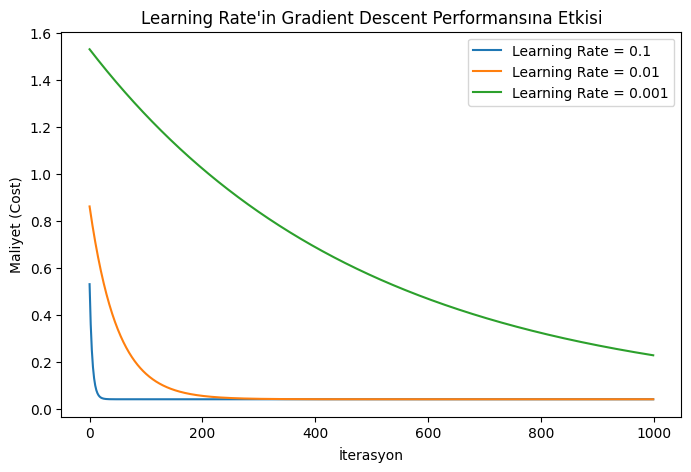

In [74]:
# Farklı öğrenme oranları için maliyetleri karşılaştırma
learning_rates = [0.1, 0.01, 0.001] 
iterations = 1000
cost_histories = {}

# Her learning rate için gradient descent çalıştırma
for lr in learning_rates:
    print(f"\nÖğrenme Oranı: {lr}")
    theta_gd, cost_history = gradient_descent(X_scaled, y, learning_rate=lr, iterations=iterations)
    cost_histories[lr] = cost_history

# Sonuçları çizdirme
plt.figure(figsize=(8, 5))
for lr in learning_rates:
    plt.plot(range(iterations), cost_histories[lr], label=f"Learning Rate = {lr}")

plt.title('Learning Rate\'in Gradient Descent Performansına Etkisi')
plt.xlabel('İterasyon')
plt.ylabel('Maliyet (Cost)')
plt.legend()
plt.show()